<a href="https://colab.research.google.com/github/GruAna/VU/blob/master/m_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keras-OCR

## Packages

These two versions of keras-ocr and matplotlib works together on Google Colab

In [1]:
!pip install keras-ocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42 kB 572 kB/s 
     |████████████████████████████████| 9.5 MB 27.7 MB/s 
     |████████████████████████████████| 944 kB 11.3 MB/s 
     |████████████████████████████████| 604 kB 56.5 MB/s 
     |████████████████████████████████| 50 kB 7.2 MB/s 
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19582 sha256=b1e47d59ff9eee2b8a108e3db509406593611ed20fddb25f983721c1fb00b03c
  Stored in directory: /root/.cache/pip/wheels/5f/55/ab/36a76989f7f88d9ca7b1f68da6d94252bb6a8d6ad4f18e04e9
Successfully built validators


Mount google drive.


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# import matplotlib.pyplot as plt
import os
import cv2 as cv
import numpy as np

from tqdm import tqdm

import keras_ocr

In [6]:
!cp drive/MyDrive/Colab_Notebooks/VU/utils.py .
from utils import *

## Dataset loading

### CTW1500 dataset

 - testing set (500 images)

Get images. Update location of images **manually**.

Comment if not using CTW1500 dataset.

In [ ]:
# whether images are to be resized (skrinking)
resize = False
# width = 3000

# path to image directory, get full path to all files
imgs_dir = '/content/drive/MyDrive/Colab_Notebooks/VU/CTW1500/test_images'

(_, _, filenames) = next(os.walk(imgs_dir))
filenames.sort()
list_img_paths = [os.path.join(imgs_dir, file) for file in filenames]
n_imgs = len(list_img_paths)

# load images
images = [(cv.imread(file)) for file in list_img_paths]
                        
# shrink images
if resize:
    images = shrink_all(images, width)
else:
    images = images.copy()

# Get paths to files with labels. Update location manually
# path to label directory, get full path to all files
labels_dir = '/content/drive/MyDrive/Colab_Notebooks/VU/CTW1500/test_labels'
(_, _, xml_files) = next(os.walk(labels_dir))
xml_files.sort()
list_xml_paths = [os.path.join(labels_dir, file) for file in xml_files]

# Get ground truths from all xml files
ground_truth = []

# if images where resized we need to resize also the coordinates in gt
if resize:
    for i, file in enumerate(list_xml_paths):
        ratio = width / images[i].shape[1]
        if ratio > 1:
            ratio = 1
        ground_truth.append(read_gt_ctw_test(file, scaling_ratio=ratio))
else:
    for i, file in enumerate(list_xml_paths):
        ground_truth.append(read_gt_ctw_test(file))

# ground_truth is in the is a list of tuples, where first is the gt word 
# and second is an array of top left and bottom right coordinates
# format: ('text', [[tl,tl],[br,br]])

### KAISTdetectiondataset

In [ ]:
# path to image and label directory, get full path to all files
directory = '/content/drive/MyDrive/Colab_Notebooks/VU/Kaist'

list_img_paths = []
list_bmp_paths = []
list_xml_paths = []
filenames = []
for path, dirs, files in os.walk(directory):
    for file in files:
        if(file.endswith(".jpg") or file.endswith(".JPG") ):
            list_img_paths.append(os.path.join(path, file))
            list_img_paths.sort()
            filenames.append(file)
        if(file.endswith(".bmp")):
            list_bmp_paths.append(os.path.join(path, file))
            list_bmp_paths.sort()
        if(file.endswith(".xml")):
            list_xml_paths.append(os.path.join(path, file))
            list_xml_paths.sort()


n_imgs = len(list_img_paths)
n_bmps = len(list_bmp_paths)
n_labels = len(list_xml_paths)

assert n_imgs == n_labels, "Check both xml and image files"

# whether images are to be resized (skrinking)
resize = False
# width = 3000

# load images
images = [(cv.imread(file)) for file in list_img_paths]
# load images = bmp images (detected text)
# images = [(cv.imread(file)) for file in list_bmp_paths]

# from already text detected images, which are provided in Kaist dataset
# images = [(cv.imread(file)) for file in list_bmp_paths]
  
# shrink images
if resize:
    images = shrink_all(images, width)
else:
    images = images.copy()

# Get ground truths from all xml files
ground_truth = []

# if images where resized we need to resize also the coordinates in gt
if resize:
    for i, file in tqdm(enumerate(list_xml_paths)):
        ratio = width / images[i].shape[1]
        if ratio > 1:
            ratio = 1
        ground_truth.append(read_gt_kaist(file, scaling_ratio=ratio))
else:
    for i, file in tqdm(enumerate(list_xml_paths)):
        ground_truth.append(read_gt_kaist(file))

# ground_truth is in the is a list of tuples, where first is the gt word 
# and second is an array of top left and bottom right coordinates
# format: ('text', [[tl,tl],[br,br]])

395it [04:22,  1.50it/s]


## Born digital dataset

In [ ]:
# path to image and label directory, get full path to all files
imgs_dir = '/content/drive/MyDrive/Colab_Notebooks/VU/BD/Challenge1_Training_Task12_Images'
labels_dir = '/content/drive/MyDrive/Colab_Notebooks/VU/BD/ch1_training_localization_transcription_gt'

(_, _, filenames) = next(os.walk(imgs_dir))
filenames.sort()
list_img_paths = [os.path.join(imgs_dir, file) for file in filenames]

(_, _, txt_files) = next(os.walk(labels_dir))
txt_files.sort()
list_txt_paths = [os.path.join(labels_dir, file) for file in txt_files]

n_imgs = len(list_img_paths)
n_labels = len(list_txt_paths)

assert n_imgs == n_labels, "Check both ground truth and image files"

# whether images are to be resized (skrinking)
resize = False
# width = 3000

# load images
images = [(cv.imread(file)) for file in list_img_paths]
  
# shrink images
if resize:
    images = shrink_all(images, width)
else:
    images = images.copy()

# grayscale
# images = [cv.cvtColor(img, cv.COLOR_BGR2GRAY) for img in images]

# threshold
# patches = [(img.shape[0] // 16) * 2 + 1 for img in images]
# images = [cv.adaptiveThreshold(images[i], 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, patches[i], 5) for i in range(n_imgs)]


# Get ground truths from all xml files
ground_truth = []

# if images where resized we need to resize also the coordinates in gt
if resize:
    for i, file in tqdm(enumerate(list_xml_paths)):
        ratio = width / images[i].shape[1]
        if ratio > 1:
            ratio = 1
        ground_truth.append(read_gt_bd(file, scaling_ratio=ratio))
else:
    for i, file in tqdm(enumerate(list_txt_paths)):
        ground_truth.append(read_gt_bd(file))

# ground_truth is in the is a list of tuples, where first is the gt word 
# and second is an array of top left and bottom right coordinates
# format: ('text', [[tl,tl],[br,br]])

410it [05:59,  1.14it/s]


## Vienna City Poster dataset

In [ ]:
# path to image and label directory, get full path to all files
# original size of images, shrinked images
imgs_dir = '/content/drive/MyDrive/Colab_Notebooks/VU/alljpg'
labels_dir = '/content/drive/MyDrive/Colab_Notebooks/VU/allxml'

(_, _, filenames) = next(os.walk(imgs_dir))
filenames.sort()
list_img_paths = [os.path.join(imgs_dir, file) for file in filenames[123:]]

(_, _, xml_files) = next(os.walk(labels_dir))
xml_files.sort()
list_xml_paths = [os.path.join(labels_dir, file) for file in xml_files[123:]]

n_imgs = len(list_img_paths)
n_labels = len(list_xml_paths)
assert n_imgs == n_labels, "Check both xml and image files"

# whether images are to be resized (skrinking)
resize = False
# whether image WERE resized (small images are loaded from directory)
resized = False
# width of scaled images
width = 1000


# load images
images = [(cv.imread(file)) for file in list_img_paths]
  
# shrink images
if resize:
    images = shrink_all(images, width)

# Get ground truths from all xml files
ground_truth = []

# if images where resized we need to resize also the coordinates in gt
if resize:
    for i, file in tqdm(enumerate(list_xml_paths)):
        ratio = width / images[i].shape[1]
        if ratio > 1:
            ratio = 1
        ground_truth.append(read_gt_wien(file, scaling_ratio=ratio))
elif resized:
    for i, file in tqdm(enumerate(list_xml_paths)):
        ground_truth.append(read_gt_wien(file, scaling_ratio=width, resized_previously=resized))
else:
    for i, file in tqdm(enumerate(list_xml_paths)):
        ground_truth.append(read_gt_wien(file))

# ground_truth is in the is a list of tuples, where first is the gt word 
# and second is an array of top left and bottom right coordinates
# format: ('text', [[tl,tl],[br,br]])

22it [00:20,  1.07it/s]

## Prediction

Run OCR method.

In [ ]:
# keras-ocr will automatically download pretrained weights for the detector and recognizer.
import string

# CUSTOM MODEL
# default + space
# alphabet = string.ascii_lowercase + string.digits + ' '
# case sensitive + special characters
# alphabet = string.ascii_letters + string.digits + '* /.:,+-¥$%&=!?'

# myrecognizer = keras_ocr.recognition.Recognizer(alphabet=alphabet)
# myrecognizer.model.load_weights('recognizer_ctw4chars.h5')
# pipeline = keras_ocr.pipeline.Pipeline(recognizer=myrecognizer)

# DEFAULT MODEL
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


Adjust batch size based on your GPU.

In [ ]:
predictions = []

# adjust batch size (step)
# step = 1 # for large images (at least one has one dimension greater than 800px)
step = 1                                 # batch size
number_of_batches = n_imgs // step   # how many times does a batch of given step size fits to list_img_paths (based on length) (integer division)
for i in tqdm(range(number_of_batches)):
    if (i+1)*step+1 < step*number_of_batches:
        predictions += (pipeline.recognize(images[i*step : (i+1)*step]))
    # else is for last, possibly incomplete, batch
    else:
        predictions += (pipeline.recognize(images[i*step : ]))
    # each list of predictions in prediction_groups is a list of (word, box) tuples.


100%|██████████| 395/395 [02:51<00:00,  2.30it/s]


## Results postprocessing

Calculate bounding rectangles for detected words in an image.

For all images.

Replace polygon coordinates by these two rectangle coordinates.

In [ ]:
# gather non empty predictions in a list of tuples (word, bounding_box_coordinates)
# predicted contains all images, each image can have multiple recognized words
# each image contains tuples in mentioned format

predicted = []
for i in range(n_imgs):
    results = []
    for text, box in predictions[i]:
        if len(text) > 0 and not text.isspace():
            results.append((text, bounding_rectangle(box)))
    predicted.append(results)

Compare bounding boxes of predicition and ground truth.

Count Intersection over Union (IoU) metric for bounding boxes. Store for all images in a list `iou_images`.

Count Character Error Rate (CER) metric for characters in words. Store for all images in a list `cer_images`.

In [ ]:
def compare_text_cer(text, special_characters=False, case_sensitive=False, spaces=True, split=True):
    """
    Parameters:
    - text: tuple of (ground_truth, predicted)
    - special_characters=False: if False then ignores all characters except alphanumeric
    - case_sensitive=False: if False then interprets text as lowercase 
    - split: in case that model tends to detect words that belongs to each other as separate words
    """
    text_gt, text_pred = text
    # remove special characters and case sensitivity if necessary
    if not spaces:
        text_gt = "".join(char for char in text_gt if (char.isalnum()))
        text_pred = "".join(char for char in text_pred if (char.isalnum()))
    elif not special_characters:
        text_gt = "".join(char for char in text_gt if (char.isalnum() or char.isspace()))
        text_pred = "".join(char for char in text_pred if (char.isalnum() or char.isspace()))
    if not case_sensitive:
        text_gt = text_gt.lower()
        text_pred = text_pred.lower()
    
    corresponding_words = []

    if split:
        words_gt = text_gt.split(" ")
        words_pred = text_pred.split(" ")

        # list of words that are corresponding (based on levenshtein distance)
        # and cer value. (=tuple of three elements)
        # for every predicted word find its corresponding gt wordle
        for word_pred in words_pred:    
            min_dist = (1000, (0, 0))
            min_gt_word = ""                  
            for word_gt in words_gt: 
                l_dist = levenshtein_distance(word_gt, word_pred)
                if l_dist[0] < min_dist[0]:
                    min_dist = l_dist
                    min_gt_word = word_gt
            # count normalized cer (the result will be from 0 to 1), 1 is the worst
            # for computation we devide Levenshtein dist. by sum 
            # of the length of the word and count of insertions performed
            if len(min_gt_word) > 0 and len(word_pred) > 0:
                cer = min_dist[0] / (len(min_gt_word) + min_dist[1][2])
            else:
                cer = 1
            corresponding_words.append((min_gt_word, word_pred, cer))

        # no split of words    
    else:
        l_dist = levenshtein_distance(text_gt, text_pred)

        if len(text_gt) > 0 and len(text_pred) > 0:
            cer = l_dist[0] / (len(text_gt) + l_dist[1][2])
        else:
            cer = 1
        corresponding_words.append((text_gt, text_pred, cer))

    return sorted(corresponding_words)

In [ ]:
iou_images = []
cer_images = []

# loop through images:
for i in range(n_imgs):
    # separate list on columns (iterate through tuples in the list)
    if len(predicted[i]) and len(ground_truth[i]):
        predicted_cols = list(zip(*predicted[i]))
    else:
        iou_images.append(None)
        cer_images.append(None)
        continue
    ground_truth_cols = list(zip(*ground_truth[i]))

    # take only coordinate arrays from list for each images
    pred_boxes = predicted_cols[1]
    gt_boxes = ground_truth_cols[1]
    iou_from_image = iou_image(pred_boxes, gt_boxes)

    iou_text_regions = group_text(iou_from_image)

    # take only labels for each image
    pred_labels = predicted_cols[0]
    gt_labels = ground_truth_cols[0]

    # compare corresponding labels
    # comparision is a list of all text regions on one image
    comparision = []
    for observation in iou_text_regions:
        gt_ind = observation[-1]
        pred_ind = observation[1]
        predicted_text = " ".join([pred_labels[i] for i in pred_ind])
        gt_pred_text = (gt_labels[gt_ind], predicted_text)

        # comparision for one text region (on one image)
        comparision.append((compare_text_cer(gt_pred_text, special_characters=True, case_sensitive=True, split=False)))

    iou_images.append((iou_text_regions))
    cer_images.append((comparision))

### Metrics
Metrics for each image (average of values of all regions in one image).

IoU (detection) `iou_in_image`

CER (recognition) `cer_in_image`

In [ ]:
iou_in_image = []
cer_in_image = []

for i in range(n_imgs):
    # calculate mean based on results 
    if isinstance(cer_images[i], list):
        length = len(cer_images[i])
        mean_in_regions = average([average(list(zip(*cer_images[i][j]))[2]) for j in range(length) ])
        iou_in_image.append(average(list(zip(*iou_images[i]))[0]))
    else:
        mean_in_regions = None
        iou_in_image.append(None)

    cer_in_image.append(mean_in_regions)

## Overall results for dataset

In [ ]:
df_results = pd.DataFrame(list(zip(filenames, iou_in_image, cer_in_image)), columns =['Filename', 'IoU', 'CER'])
mean_iou = round(df_results['IoU'].mean() * 100, 1)
mean_cer = round((1 - df_results['CER'].mean()) * 100, 1)
print(f"mean IoU accuracy = {mean_iou}%, mean CER accuracy = {mean_cer}%")

df_results

mean IoU accuracy = 67.6%, mean CER accuracy = 27.9%


,Filename,IoU,CER
0,001.jpg,0.719764,1.000000
1,004.jpg,0.769406,0.166667
2,027.jpg,0.895120,0.333333
3,029.jpg,0.795619,1.000000
4,033.jpg,NaN,NaN
...,...,...,...
390,DSC02884.JPG,0.586892,0.611111
391,DSC02923.JPG,0.965417,0.142857
392,DSC02925.JPG,0.480174,0.793103
393,DSC03218.JPG,0.639711,1.000000


### Save results

In [ ]:
# set and create output directory if it doesn't exist

output_dir = 'results'
if not os.path.exists(output_dir):
    os.mkdir(output_dir)

Specify unique filename and specification.

Specification is an array of first used method, second some useful infromation.

In [ ]:
# SELECT FROM OR CREATE OWN, COMMENT UNUSED:

# basic keras-OCR (original image size, case insensitive, only alphanumeric)
# file_name = "kerasOCR_CTW_split"
# specifications = ["keras-OCR", "original image width, case insensitive, only alphanumeric, split"]

# file_name = "kerasOCR_Kaist_split"
# specifications = ["keras-OCR", "Kaist, original image size, case insensitive, only alphanumeric, split"]

# file_name = "kerasOCR_BD_nosplit"
# specifications = ["keras-OCR", "born-digital, original image size, case insensitive, only alphanumeric, no split"]

# TRAINED ON CTW
file_name = "kerasOCR_Kaist_trained-specialchars_nosplit_alph"
specifications = ["keras-OCR", "Kaist, original image width, case sensitive, special char, no split, trained special chars"]

In [ ]:
# create file with results (specify method and other parameters)

with open('%s/result_%s.txt' % (output_dir, file_name), 'w') as output_file:
    output_file.write(": ".join(str(text) for text in specifications))
    output_file.write("\n"+f"iou = {mean_iou}")
    output_file.write("\n"+f"cer = {mean_cer}")

Visualize bounding rectangles and corresponing words.

In [ ]:
cer_images[394]

[[('MEGABOX', 'ue megabox x', 1.0)],
 [('0EL6678900', 'el66789000 600', 0.5333333333333333)]]

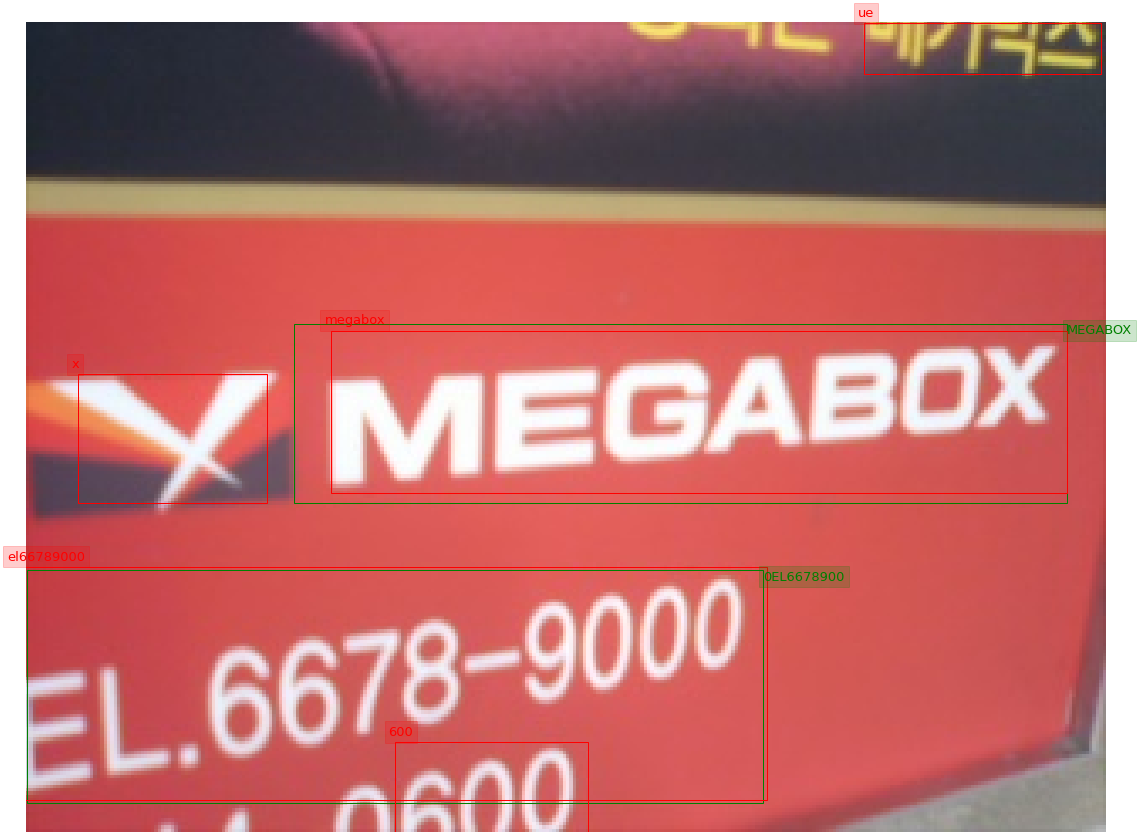

In [ ]:
# all images / one sample image
# for i in range(len(images)):
i = 394

im = plot_results(images[i], ground_truth[i], predicted[i])  
im.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)

im.savefig('%s/result_%s393.png' % (output_dir, file_name))
im.show()
